# 4.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('bollinger.csv', index_col='Date')
df.dropna(inplace=True)

In [17]:
df.head(3)

,ADANIPOWER,upper,lower,middle
Date,,,,
2017-06-12,3.731343,7.073351,-7.784706,-0.355678
2017-06-13,-1.258993,5.273200,-6.969958,-0.848379
2017-06-14,0.910747,5.289332,-6.971119,-0.840894


In [18]:
def label_call(row):
    if row['ADANIPOWER'] < row['lower']:
        return 'Buy'
    if row['lower'] < row['ADANIPOWER'] < row['middle']:
        return 'Hold Buy/ Liquidate Short'
    if row['middle'] < row['ADANIPOWER'] < row['upper']:
        return 'Hold Short/ Liquidate Buy'
    if row['ADANIPOWER'] > row['upper']:
        return "Short"

In [19]:
df['Call'] = df.apply (lambda row: label_call(row), axis=1)

In [20]:
df.rename({'ADANIPOWER': 'Close Price'}, axis=1, inplace = True)

In [21]:
df.head(3)

,Close Price,upper,lower,middle,Call
Date,,,,,
2017-06-12,3.731343,7.073351,-7.784706,-0.355678,Hold Short/ Liquidate Buy
2017-06-13,-1.258993,5.273200,-6.969958,-0.848379,Hold Buy/ Liquidate Short
2017-06-14,0.910747,5.289332,-6.971119,-0.840894,Hold Short/ Liquidate Buy


In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

## Naive Bayes

In [24]:
nb = GaussianNB()
x,y = df.drop(['Call'],axis=1), df['Call']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
nb.fit(x_train,y_train)
prediction = nb.predict(x_test)

print('With NB accuracy is: ',nb.score(x_test,y_test)) # accuracy

With NB accuracy is:  0.8881118881118881


## Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [27]:
dtree = DecisionTreeClassifier()
x,y = df.drop(['Call'],axis=1), df['Call']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
dtree.fit(x_train,y_train)
prediction = dtree.predict(x_test)

print('With Decision tree accuracy is: ',dtree.score(x_test,y_test)) # accuracy

With Decision tree accuracy is:  0.8531468531468531


## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

C:\Users\Kunal\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [29]:
rf = RandomForestClassifier()
x,y = df.drop(['Call'],axis=1), df['Call']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf.fit(x_train,y_train)
prediction = rf.predict(x_test)

print('With Random Forest accuracy is: ',rf.score(x_test,y_test)) # accuracy

With Random Forest accuracy is:  0.9020979020979021


## Support Vector Classification

In [30]:
#Scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

sc = StandardScaler()
sc.fit(x_train)
X_train_std = sc.transform(x_train)
X_test_std = sc.transform(x_test)

In [31]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)
print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train_std, y_train)))
print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test_std, y_test)))

The accuracy of the SVM classifier on training data is 0.93
The accuracy of the SVM classifier on test data is 0.88


## XGBoost

In [32]:
#Applying XGBoost
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train_std, y_train)

print('The accuracy of the XGBoost classifier on test data is {:.2f}'.format(xgb_clf.score(X_test_std, y_test)))

The accuracy of the XGBoost classifier on test data is 0.91


C:\Users\Kunal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Importing Other Data and Creating Bollinger Columns

In [2]:
df1 = pd.read_csv("MINDTREE.csv", parse_dates=True, index_col="Date")

In [3]:
df1 = df1[['Close Price']]

In [4]:
df1.head(3)

,Close Price
Date,
2017-05-15,509.45
2017-05-16,511.30
2017-05-17,506.35


In [5]:
# calculate Simple Moving Average with 20 days window
sma = df1["Close Price"].rolling(window=20).mean()
rstd = df1["Close Price"].rolling(window=20).std()

In [6]:
sma = pd.DataFrame(data = sma)

In [7]:
rstd = pd.DataFrame(data = rstd)

In [8]:
upper_band = sma + 2 * rstd
lower_band = sma - 2 * rstd
upper_band.columns = ['upper']
lower_band.columns = ['lower']

df1 = pd.merge(pd.merge(df1,upper_band,on='Date'),lower_band,on='Date')

In [9]:
sma.columns = ['middle']
df1 = df1.merge(sma, on ='Date')

In [10]:
df1.dropna(inplace=True)

In [11]:
df1.head(3)

,Close Price,upper,lower,middle
Date,,,,
2017-06-09,538.75,565.662687,486.592313,526.1275
2017-06-12,539.80,566.813031,488.476969,527.6450
2017-06-13,531.80,567.103078,490.236922,528.6700


In [13]:
def label_call(row):
    if row['Close Price'] < row['lower']:
        return 'Buy'
    if row['lower'] < row['Close Price'] < row['middle']:
        return 'Hold Buy/ Liquidate Short'
    if row['middle'] < row['Close Price'] < row['upper']:
        return 'Hold Short/ Liquidate Buy'
    if row['Close Price'] > row['upper']:
        return "Short"

In [14]:
df1['Call'] = df1.apply (lambda row: label_call(row), axis=1)

In [36]:
df1.head(3)

,Close Price,upper,lower,middle,Call
Date,,,,,
2017-06-09,538.75,565.662687,486.592313,526.1275,Hold Short/ Liquidate Buy
2017-06-12,539.80,566.813031,488.476969,527.6450,Hold Short/ Liquidate Buy
2017-06-13,531.80,567.103078,490.236922,528.6700,Hold Short/ Liquidate Buy


In [39]:
x,y = df1.drop(['Call'],axis=1), df1['Call']

### Checking Results Of Previous Models

### NB

In [41]:
print('With Naive Bayes accuracy is: ',nb.score(x,y)) # accuracy

With Naive Bayes accuracy is:  0.3431578947368421


### Random Forest

In [42]:
print('With Random Forest accuracy is: ',rf.score(x,y)) # accuracy

With Random Forest accuracy is:  0.3431578947368421


### XGBoost

In [43]:
X_test_std = sc.transform(x)

In [44]:
print('The accuracy of the XGBoost classifier on test data is {:.2f}'.format(xgb_clf.score(X_test_std, y)))

The accuracy of the XGBoost classifier on test data is 0.56


C:\Users\Kunal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# 4.2

In [87]:
dft = pd.read_csv('PNB.csv')

In [88]:
dft.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PNB,EQ,15-May-2017,169.15,169.95,171.3,166.2,166.85,166.80,168.94,7476618,1.263123e+09,41641,1352589,18.09
1,PNB,EQ,16-May-2017,166.80,167.35,178.0,164.8,173.20,174.15,173.13,51532461,8.921904e+09,254027,5804867,11.26
2,PNB,EQ,17-May-2017,174.15,173.00,173.1,164.3,164.80,165.05,167.27,26536944,4.438942e+09,116512,7037498,26.52


In [89]:
dft['Per_change_open_close'] = (dft['Open Price'] -dft['Close Price']/ dft['Open Price'])*100
dft['Diif_High_low'] = (dft['High Price'] -dft['Low Price']/ dft['High Price'])*100
dft['rollingmean_perc_change'] = dft["Day_Perc_Change"] = dft["Close Price"].pct_change().rolling(5).mean()
dft['rollingstd_perc_change'] = dft["Day_Perc_Change"] = dft["Close Price"].pct_change().rolling(5).std()

In [90]:
dft.loc[dft['Close Price'] > dft['Close Price'].shift(-1) , 'Action'] = float(1)
dft.loc[dft['Close Price'] < dft['Close Price'].shift(-1) , 'Action'] = float(-1)

In [91]:
dft.shape

(494, 21)

In [92]:
dft.isnull().sum()

Symbol                     0
Series                     0
Date                       0
Prev Close                 0
Open Price                 0
High Price                 0
Low Price                  0
Last Price                 0
Close Price                0
Average Price              0
Total Traded Quantity      0
Turnover                   0
No. of Trades              0
Deliverable Qty            0
% Dly Qt to Traded Qty     0
Per_change_open_close      0
Diif_High_low              0
rollingmean_perc_change    5
Day_Perc_Change            5
rollingstd_perc_change     5
Action                     6
dtype: int64

In [93]:
dft.dropna(inplace=True)

In [94]:
dft.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Per_change_open_close,Diif_High_low,rollingmean_perc_change,Day_Perc_Change,rollingstd_perc_change,Action
5,PNB,EQ,22-May-2017,155.20,157.50,158.00,150.25,151.05,150.95,153.77,...,1.823359e+09,61559,1874308,15.81,15654.158730,15704.905063,-0.019216,0.037364,0.037364,1.0
6,PNB,EQ,23-May-2017,150.95,151.95,154.35,145.55,149.10,149.75,150.19,...,2.730135e+09,84779,2318975,12.76,15096.447845,15340.701328,-0.029619,0.017071,0.017071,1.0
7,PNB,EQ,24-May-2017,149.75,149.70,152.35,146.50,147.30,147.45,149.16,...,1.876156e+09,63143,1093155,8.69,14871.503006,15138.839842,-0.022240,0.012087,0.012087,-1.0


In [95]:
dft1 = dft[['Per_change_open_close', 'Diif_High_low', 'rollingmean_perc_change', 'rollingstd_perc_change','Action']]

In [96]:
dft1.head(3)

,Per_change_open_close,Diif_High_low,rollingmean_perc_change,rollingstd_perc_change,Action
5,15654.158730,15704.905063,-0.019216,0.037364,1.0
6,15096.447845,15340.701328,-0.029619,0.017071,1.0
7,14871.503006,15138.839842,-0.022240,0.012087,-1.0


In [97]:
rf = RandomForestClassifier()
x,y = dft1.drop(['Action'],axis=1), dft1['Action']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf.fit(x_train,y_train)
prediction = rf.predict(x_test)

print('With Random Forest accuracy is: ',rf.score(x_test,y_test)) # accuracy

With Random Forest accuracy is:  0.5310344827586206


In [99]:
dft['Cumulative'] = ((dft['Close Price'].pct_change() +1 ).cumprod() -1)* 100

Text(0,0.5,'Cumulative Return')

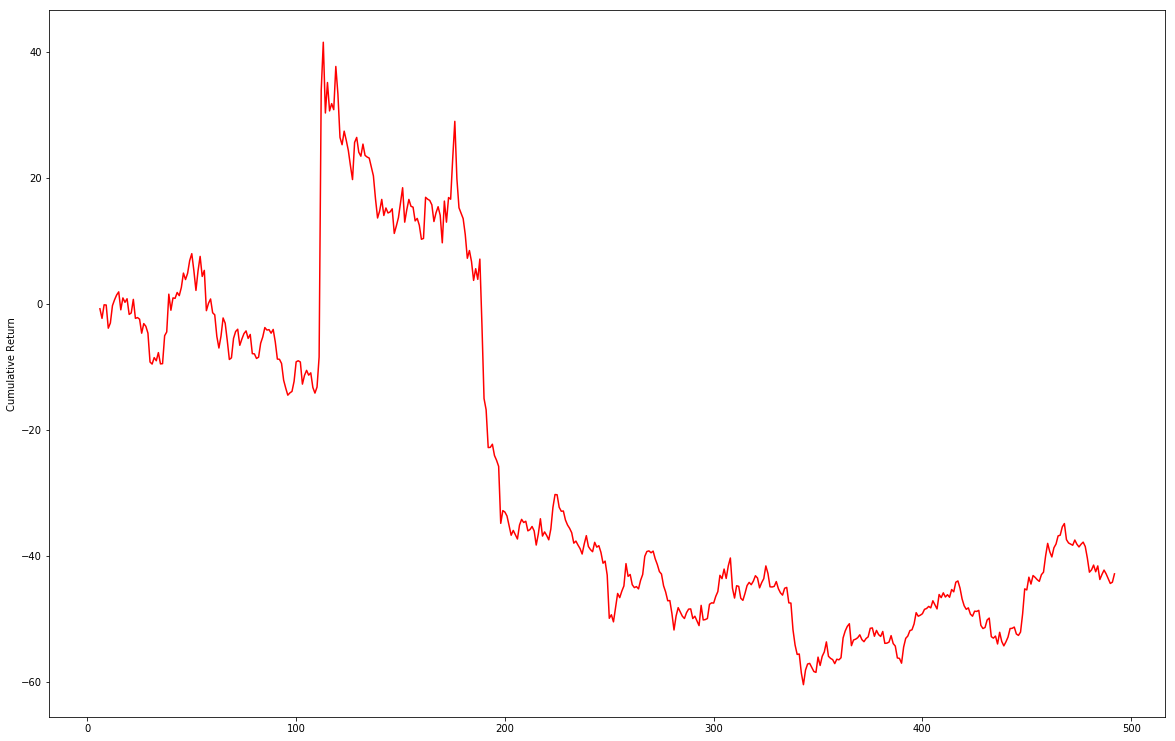

In [101]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 20
fig_size[1] = 13
plt.rcParams['figure.figsize'] = fig_size
plt.plot(dft['Cumulative'], color = 'red')
plt.ylabel('Cumulative Return')